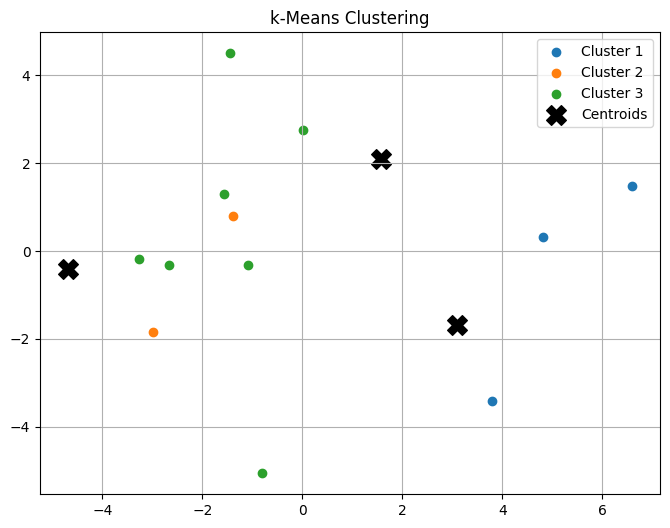

Cluster Assignments: [2 0 2 1 1 0 2 2 2 0 2 2]
Final Centroids: 
[[5.93407078 7.21975806 8.83126514 5.99229975]
 [3.10531988 1.17564826 4.64797815 6.34911496]
 [5.87811913 3.55992964 3.21439015 5.22139443]]
WCSS (Within-Cluster Sum of Squares): 121.6429900839918


In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
data = np.random.rand(12, 4) * 10


def random_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    cluster_assignments = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        closest_centroid_idx = np.argmin(distances)
        cluster_assignments.append(closest_centroid_idx)
    return np.array(cluster_assignments)

def update_centroids(data, assignments, k):
    updated_centroids = np.zeros((k, data.shape[1]))
    for cluster_idx in range(k):
        assigned_points = data[assignments == cluster_idx]
        updated_centroids[cluster_idx] = np.mean(assigned_points, axis=0)
    return updated_centroids

def calculate_wcss(data, assignments, centroids):
    total_wcss = 0
    for cluster_idx in range(len(centroids)):
        assigned_points = data[assignments == cluster_idx]
        total_wcss += np.sum((assigned_points - centroids[cluster_idx])**2)
    return total_wcss

def kmeans_algorithm(data, k, max_iterations=100, tolerance=1e-4):
    centroids = random_centroids(data, k)
    prev_centroids = np.zeros_like(centroids)
    assignments = np.zeros(data.shape[0])

    for _ in range(max_iterations):
        assignments = assign_clusters(data, centroids)
        centroids = update_centroids(data, assignments, k)

        if np.all(np.abs(centroids - prev_centroids) < tolerance):
            break

        prev_centroids = centroids.copy()

    return assignments, centroids

num_clusters = 3
cluster_assignments, final_centroids = kmeans_algorithm(data, num_clusters)

wcss_value = calculate_wcss(data, cluster_assignments, final_centroids)

def simple_pca(data, components=2):
    mean_centered = data - np.mean(data, axis=0)
    covariance_matrix = np.cov(mean_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]
    reduced_data = mean_centered.dot(sorted_eigenvectors[:, :components])
    return reduced_data

if data.shape[1] > 2:
    reduced_data = simple_pca(data, components=2)
    reduced_centroids = simple_pca(final_centroids, components=2)
else:
    reduced_data = data
    reduced_centroids = final_centroids

plt.figure(figsize=(8, 6))

for i in range(num_clusters):
    plt.scatter(reduced_data[cluster_assignments == i, 0], reduced_data[cluster_assignments == i, 1], label=f'Cluster {i+1}')

plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('k-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster Assignments: {cluster_assignments}")
print(f"Final Centroids: \n{final_centroids}")
print(f"WCSS (Within-Cluster Sum of Squares): {wcss_value}")
